In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [7]:
def P1(num_examples=5):
### STUDENT START ###
 
    """
    NOTES TO MYSELF 
        - train_labels = numbers that signify the label of the category for the description 
            (ex: 1, where 1= alt.religion)
        - newsgroups_train.target_names = actual label of the category
    """
    
    for x in range(0, num_examples):
        print train_data[x]
        print " \nlabel: '%s'" %newsgroups_train.target_names[train_labels[x]]
        print '----------------\n'
      
    
### STUDENT END ###
P1()

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
 
label: 'comp.graphics'
----------------



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.
 
label: 'talk.rel

Notes to myself:
    
    *sklearn.datasets.fetch_20newsgroups
    
    http://scikit-learn.org/stable/datasets/twenty_newsgroups.html

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [9]:
def P2():
### STUDENT START ###
    train_vect = CountVectorizer()
    train_vectors = train_vect.fit_transform(train_data)
    train_vocab = train_vect.vocabulary_
    
    #PART A
    print "PART A:"
    print "Size of vocabulary = %d" %len(train_vocab)
    print "Average number of non-zero features per example = %f" %(train_vectors.getnnz()/float(train_vectors.shape[0]))
    
    #calculate total entries (# rows x # columns)
    totalentries = train_vectors.get_shape()[0] * train_vectors.get_shape()[1]
    print "Fraction of entries in matrix that are nonzero %f" % (float(train_vectors.getnnz()) / float(totalentries))
    print "\n"
    
    
    
    #PART B
    print "PART B:"
    print "0th feature strings: %s" %train_vect.get_feature_names()[0] 
    print "Last feature strings: %s" %train_vect.get_feature_names()[len(train_vect.get_feature_names())-1]
    print "\n"
    
    
    
    #PART C
    print "PART C:"
    myownvocab = ["atheism", "graphics", "space", "religion"]
    myownvocabvect = CountVectorizer(vocabulary = myownvocab)
    myownvocabcount = myownvocabvect.fit_transform(train_data)
    
    #confirm training vectors are appropriatly shaped
    print "Training vector shape = {0}".format(myownvocabcount.shape)
    #average # of nonzero features per example should be SMALLER than before 
    #(because now we're only looking for THOSE 4 words, other words are not counted )
    print "Average number of non-zero features per example = %f" %(myownvocabcount.getnnz()/float(myownvocabcount.shape[0]))
    print "\n"
    
    
    
    #PART D
    print "PART D:"
    
    #extracting bigram characters
    bitrivect = CountVectorizer(analyzer = "char", ngram_range=(2,3))
    bitrivectcount = bitrivect.fit_transform(train_data)
    bitrivocab = bitrivect.vocabulary_
    #size of vocab should be larger than before(because before we were observing unigram WORDS)
    print "Size of vocabulary (bigram)= %d" %len(bitrivocab)
    print "\n"
    
    
    
    #PART E:
    print "PART E:"
    
    #prune words that occur in less than 10 documents
    lessthantenvect = CountVectorizer(min_df = 10)
    lessthantencount = lessthantenvect.fit_transform(train_data)
    lessthantenvocab = lessthantenvect.vocabulary_
    print "Size of vocabulary (words in less than 10 documents) = %d" %len(lessthantenvocab)
    print "\n"
        
    #PART F:
    print "PART F:"
    
    dev_vect = CountVectorizer()
    dev_vectors = dev_vect.fit_transform(dev_data)
    dev_vocab = dev_vect.vocabulary_
    train_dict_set = set(train_vocab.keys())
    dev_dict_set = set(dev_vocab.keys())
    diff = dev_dict_set.difference(train_dict_set)
    
    print "Number of vocabulary words missing from dev data = %d" % len(diff)
    print "Fraction of words in dev data missing from train vocabulary: {0}".format((float(len(diff)) / float(len(dev_dict_set))))
    
### STUDENT END ###
P2()

PART A:
Size of vocabulary = 26879
Average number of non-zero features per example = 96.705998
Fraction of entries in matrix that are nonzero 0.003598


PART B:
0th feature strings: 00
Last feature strings: zyxel


PART C:
Training vector shape = (2034, 4)
Average number of non-zero features per example = 0.268437


PART D:
Size of vocabulary (bigram)= 35478


PART E:
Size of vocabulary (words in less than 10 documents) = 3064


PART F:
Number of vocabulary words missing from dev data = 4027
Fraction of words in dev data missing from train vocabulary: 0.247876400345


Notes to myself about P2:
    * http://scikit-learn.org/stable/datasets/twenty_newsgroups.html
    
    * In order to feed predictive or clustering models with the text data, one first needs to turn the text into vectors of numerical values suitable for statistical analysis. This can be achieved with the utilities of the sklearn.feature_extraction.text as demonstrated in the following example that extract TF-IDF vectors of unigram tokens from a subset of 20news:
    
    * about count vectorizer: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [14]:
def P3(k_values):
### STUDENT START ###

    """
    Notes to myself:
    
    * https://msdn.microsoft.com/en-us/magazine/dn904675.aspx
    
    * The goal of LR classification is to create a model that predicts a variable that can take one of two possible
    values. For example, you might want to predict the result for a football team (lose = 0, win = 1) in an upcoming
    game based on the team’s current winning percentage (x1), field location (x2), and number of players absent due
    to injury (x3).
    
    * http://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul
    
    Q: What is C in the logistic regression model?
    A: applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting
    
    """

    
    vect = CountVectorizer()
    train_vect = vect.fit_transform(train_data)
    dev_vect = vect.transform(dev_data)

  
    # k neearest neighbors classifier

    # optimal k for knn with GridSearchCV.
    n_neighbors = {'n_neighbors': k_values}
    knn = KNeighborsClassifier()
    knn_gs = GridSearchCV(knn, n_neighbors, scoring='f1_weighted')
    knn_gs.fit(train_vect, train_labels)
    opt_k = knn_gs.best_params_['n_neighbors']
    print "K-Nearest Neighbors Classifier:"
    print "  Optimal k for k nearest neighbors classifier: {0}".format(opt_k)

    # f1_score with best k for knn
    knn_opt = KNeighborsClassifier(n_neighbors = opt_k)
    knn_opt.fit(train_vect, train_labels)
    knn_preds = knn_opt.predict(dev_vect)
    knn_f1 = metrics.f1_score(dev_labels, knn_preds, average='weighted')
    
     
    print "  The F1 score for the nearest neighbor classifier is:" + `knn_f1`
    print "\n"
    
    # MNB



    alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    mnb = MultinomialNB()
    mnb_gs = GridSearchCV(mnb, alphas, scoring='f1_weighted')
    mnb_gs.fit(train_vect, train_labels)
    opt_alpha = mnb_gs.best_params_['alpha']
    print "\nMultinomial Naive Bayes Classifier:"
    print "  Optimal alpha for multinomial naive bayes classifier:" + `opt_alpha`

    mnb_opt = MultinomialNB(alpha = opt_alpha)
    mnb_opt.fit(train_vect, train_labels)
    mnb_preds = mnb_opt.predict(dev_vect)
    mnb_f1 = metrics.f1_score(dev_labels, mnb_preds, average='weighted')
    
    print "  The F1 score for the multinomial nb classifier is:" + `mnb_f1`
    print "\n"
  


    # Logistic Regression

    C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    lr = LogisticRegression(penalty='l2')
    lr_gs = GridSearchCV(lr, C, scoring='f1_weighted')
    lr_gs.fit(train_vect, train_labels)
    opt_C = lr_gs.best_params_['C']
    print "Logistic Regression Model:"
    print "  Optimal C for logistic regression model is:" + `opt_C`

    lr_opt = LogisticRegression(C = opt_C, penalty='l2')
    lr_opt.fit(train_vect, train_labels)
    lr_preds = lr_opt.predict(dev_vect)
    lr_f1 = metrics.f1_score(dev_labels, lr_preds, average='weighted')

    print "  The F1 score for the logistic regression classifier is:" + `lr_f1`
    print "\n"
    print "-----------------------------------------------------------------"


    # Logistic Regression - Part C:
    
    C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    for c_value in C_values:
        lr = LogisticRegression(penalty = 'l2', C = c_value)
        lr.fit(train_vect, train_labels)
        sq_sum = [sum(y) for y in lr.coef_**2]
        #sum = np.sum([np.square(lr.coef_)])
        print "The sum of the squared weight values for C = {0}, is: \n {1}".format(c_value, sq_sum)
        print "\n"
    

    
    #Answers to questions
    
    print "a) \n"
    print "KNN doesn't work well for this problem because for KNN to work, you need to have more dense data."
    print "The data set here is sparse and some of the features only occur in small frequencies."
    print "Intuitively, a sparse data set makes it hard to define \"neighbors\" and thus the KNN model isn't very effective."
    print "\n"
    
    print "b) \n"
    print "Logistic regression does well because it does factor relationships between these words versus the strong"
    print "assumption of independence in features of Naive Bayes works well the bag of words model we have, where order"
    print "and relationship between words don't matter."
    print "\n"
    
    print "c) \n"
    print "C is the inverse of the regularization (penalization) factor"
    print "As the value of C increases, the sum of the squared weights increase."
    print "Lower values of C, penalize the model more (because it is the inverse of the penalization factor.)"
    print "So lower values of C, penalizes the model and reduces the weights (sq sums)."
    print "And when higher values of C, lower the penalty for the model and increase the weights (sq sums)"
    print "\n"
    
### STUDENT END ###
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
P3(k_values)

K-Nearest Neighbors Classifier:
  Optimal k for k nearest neighbors classifier: 12
  The F1 score for the nearest neighbor classifier is:0.42110263613868232



Multinomial Naive Bayes Classifier:
  Optimal alpha for multinomial naive bayes classifier:0.01
  The F1 score for the multinomial nb classifier is:0.77516632185443568


Logistic Regression Model:
  Optimal C for logistic regression model is:0.1
  The F1 score for the logistic regression classifier is:0.69662435424188329


-----------------------------------------------------------------
The sum of the squared weight values for C = 0.001, is: 
 [0.16509345166829453, 0.20095274690581957, 0.18067093754396751, 0.18724278437848996]


The sum of the squared weight values for C = 0.01, is: 
 [2.5414784670795796, 2.9397093683565245, 2.862468838763121, 2.2500292098346359]


The sum of the squared weight values for C = 0.1, is: 
 [27.131063034333021, 24.659040100709266, 27.457741536122626, 23.026053110103742]


The sum of the squared wei

ANSWER:

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [18]:
def P4():
### STUDENT START ###

    """
    NOTES TO MYSELF
        - there are 4 labels
        - 5 features for each (largest weights) = 20 total features
        - figured out that the best C for logistic regression is 0.1
    """

    vect_unigram = CountVectorizer()
    train_vect_unigram = vect_unigram.fit_transform(train_data)
    dev_vect_unigram = vect_unigram.transform(dev_data)

    lr_unigram = LogisticRegression(C=0.1, penalty='l2')
    lr_unigram.fit(train_vect_unigram, train_labels)
    feature_names_unigram = vect_unigram.get_feature_names()
    gram = 1
    LargestFeatureTable(feature_names_unigram, lr_unigram.coef_,newsgroups_train.target_names,gram)

    print "------"

    vect_bigram = CountVectorizer(analyzer="word", ngram_range=(2,2))
    train_vect_bigram = vect_bigram.fit_transform(train_data)
    dev_vect_bigram = vect_bigram.transform(dev_data)

    lr_bigram = LogisticRegression(C=0.1, penalty='l2')
    lr_bigram.fit(train_vect_bigram, train_labels)
    feature_names_bigram = vect_bigram.get_feature_names()
    gram = 2
    LargestFeatureTable(feature_names_bigram, lr_bigram.coef_,newsgroups_train.target_names, gram)
    
    print "\n"
    print "\n"
    
    print "Surprising Features:"
    print "The unigrm word features didn't have many surprising elements."
    print "However, the bigram model was interesting because of phrases like \"cheers kent\" which was surprising"
    print "that it was a frequented phrase. It was espcially surprising to see this as a top phrase for alt.atheism!!"
    
def LargestFeatureTable(feature_names, coef, labels, gram):
    top_20_features = []
    for label, feature_coef in enumerate(coef):
        ordered_feature_coef = np.sort(feature_coef)
        top_5 = ordered_feature_coef[len(ordered_feature_coef)-5:]
        for x in top_5: 
            top_20_features.append(feature_coef.tolist().index(x))
        #each print statement appends 5 more features (a set of 5 for each class)
        #4 classes total => 20 features
        
        print "debugging double check print statement: each print should contain 5 more feature indices"
        print top_20_features
      
    
    print "\n"
    if gram == 1:
        print "Unigram (1 word) Features"

    if gram == 2:
        print "Bigram (2 word) Features"
        
    print "Feature:", newsgroups_train.target_names[0], "\t", newsgroups_train.target_names[1],"\t", newsgroups_train.target_names[2], "\t",newsgroups_train.target_names[3]
    for i, feature_index in enumerate(top_20_features):
        feature_name = feature_names[feature_index]
        feature_weights = [round(coef[label, feature_index], 4) for label in range(coef.shape[0])]
        print "{0}:".format(feature_name), "\t", feature_weights[0], "\t", feature_weights[1], "\t", feature_weights[2],"\t", feature_weights[3]
    
    
    
    
    
    
### STUDENT END ###
P4()

debugging double check print statement: each print should contain 5 more feature indices
[13668, 3870, 4784, 20430, 3866]
debugging double check print statement: each print should contain 5 more feature indices
[13668, 3870, 4784, 20430, 3866, 1145, 6555, 10376, 12769, 11552]
debugging double check print statement: each print should contain 5 more feature indices
[13668, 3870, 4784, 20430, 3866, 1145, 6555, 10376, 12769, 11552, 16358, 14540, 16697, 17597, 22567]
debugging double check print statement: each print should contain 5 more feature indices
[13668, 3870, 4784, 20430, 3866, 1145, 6555, 10376, 12769, 11552, 16358, 14540, 16697, 17597, 22567, 10234, 17609, 4743, 5904, 5901]


Unigram (1 word) Features
Feature: alt.atheism 	comp.graphics 	sci.space 	talk.religion.misc
islam: 	0.4262 	-0.0848 	-0.165 	-0.1649
atheists: 	0.4615 	-0.0794 	-0.1584 	-0.2953
bobby: 	0.4781 	-0.1204 	-0.1678 	-0.2278
religion: 	0.494 	-0.2988 	-0.3932 	0.0039
atheism: 	0.4955 	-0.2073 	-0.1999 	-0.2678
3

ANSWER:

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [30]:
def empty_preprocessor(s):
    return s


def better_preprocessor(s):
### STUDENT START ###

    s_processed = s
    
    #lower case everything
    s_processed = s_processed.lower()
    
    #replace new lines with spaces
    s_processed = re.sub('\n', ' ', s_processed)
    
    #replace any number (of any length) with token
    s_processed = re.sub('[0]', ' ', s_processed)
    #s_processed = re.sub('\d\d+',' ', s_processed)
    
    #get rid of non alphanumeric characters
    #s_processed = re.sub('[^a-zA-Z\d\s]{1}', ' ', s_processed)
    
    
    #replacing symbols
    s_processed = re.sub('[$@!+=~*{}<>&%]', ' ', s_processed)
    
    
    return s_processed

### STUDENT END ###

"""
NOTES TO MYSELF
*https://books.google.com/books?id=IimgDQAAQBAJ&pg=PA115&lpg=PA115&dq=different+ways+to+normalize+input+text+python&source=bl&ots=xYOEk3cVNt&sig=pBrfsXCa5usOCsHaGRDFDQJTdgo&hl=en&sa=X&ved=0ahUKEwjft7Ku79LSAhWov1QKHQZQDO8Q6AEIUjAJ#v=onepage&q=different%20ways%20to%20normalize%20input%20text%20python&f=false
REGEX (regular expressions operations)
"""


def P5():
### STUDENT START ###

    #EMPTY PROCESSER + LOGISTIC REGRESSION
    vect_empty = CountVectorizer(preprocessor = empty_preprocessor)
    train_vect_empty = vect_empty.fit_transform(train_data)
    dev_vect_empty = vect_empty.transform(dev_data)
    
    
    lr_empty = LogisticRegression(C=0.1, penalty='l2')
    lr_empty.fit(train_vect_empty, train_labels)
    lr_preds_empty = lr_empty.predict(dev_vect_empty)
    
    print "Emtpy Processor"
    print "Size of vocabulary = %d" %len(vect_empty.vocabulary_)
    print "  F1 score: {0}".format(metrics.f1_score(dev_labels, lr_preds_empty, average='weighted'))
    print "\n"
    
    
    #BETTER PROCESSOR + LOGISTIC REGRESSION
    vect_better = CountVectorizer(preprocessor = better_preprocessor)
    train_vect_better = vect_better.fit_transform(train_data)
    dev_vect_better = vect_better.transform(dev_data)
    
    
    lr_better = LogisticRegression(C=0.1, penalty='l2')
    lr_better.fit(train_vect_better, train_labels)
    lr_preds_better = lr_better.predict(dev_vect_better)
    
    print "Better Processor"
    print "Size of vocabulary = %d" %len(vect_better.vocabulary_)
    print "  F1 score: {0}".format(metrics.f1_score(dev_labels, lr_preds_better, average='weighted'))
    
### STUDENT END ###
P5()




Emtpy Processor
Size of vocabulary = 33291
  F1 score: 0.701397454667


Better Processor
Size of vocabulary = 26193
  F1 score: 0.710513837775


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

-------------------------------

C used: 0.001
L1 REGRESSION
Size of vocabulary = 26879
 F1 score: 0.24042943423
non-zero learned weights: 7


L2 REGRESSION
Size of vocabulary = 26879
 F1 score: 0.613238290535
non-zero learned weights: 107516


L2 # non-zero trimmed feature set: 16
Accuracy: 0.397928994083
Size of Trimmed feature set: 4
-------------------------------

C used: 0.01
L1 REGRESSION
Size of vocabulary = 26879
 F1 score: 0.419107672661
non-zero learned weights: 49


L2 REGRESSION
Size of vocabulary = 26879
 F1 score: 0.657597176603
non-zero learned weights: 107516


L2 # non-zero trimmed feature set: 88
Accuracy: 0.498520710059
Size of Trimmed feature set: 22
-------------------------------

C used: 0.1
L1 REGRESSION
Size of vocabulary = 26879
 F1 score: 0.639246541894
non-zero learned weights: 462


L2 REGRESSION
Size of vocabulary = 26879
 F1 score: 0.659033913088
non-zero learned weights: 107516


L2 # non-zero trimmed feature set: 1036
Accuracy: 0.692307692308
Size of T

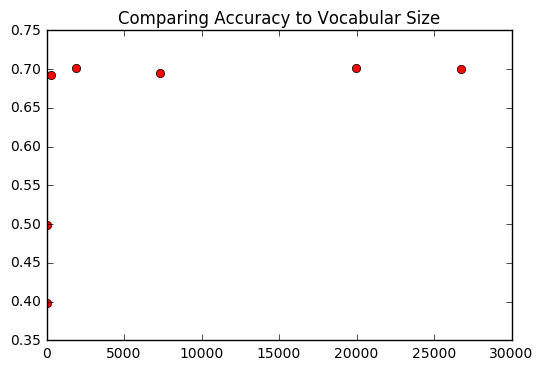

In [47]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    c_param = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    accuracy = []
    vocab_size = []
    
    for c_val in c_param:
        pair = ModelTrain(c_val)
        accuracy.append(pair[0])
        vocab_size.append(pair[1])
        
    #graph of model's (retrained) accuracy against trimmed size
    plt.title('Comparing Accuracy to Vocabular Size')
    plt.plot(vocab_size, accuracy, 'ro')
    
def ModelTrain(c_val):   
    print "-------------------------------"
    print "\nC used: {0}".format(c_val)
    vect = CountVectorizer()
    train_vect = vect.fit_transform(train_data)
    dev_vect = vect.transform(dev_data)
    
    # L1 REGRESSION
    
    lr_one = LogisticRegression(C=c_val, penalty='l1', tol=0.1)
    lr_one.fit(train_vect, train_labels)
    lr_one_preds = lr_one.predict(dev_vect)
    print "L1 REGRESSION"
    print "Size of vocabulary = %d" %len(vect.vocabulary_)
    print " F1 score: {0}".format(metrics.f1_score(dev_labels, lr_one_preds, average='weighted'))
    print "non-zero learned weights: {0}".format(np.count_nonzero(lr_one.coef_))
    print "\n"
    
    
    # L2 REGRESSION
    lr_two = LogisticRegression(C=c_val, penalty='l2', tol=0.1)
    lr_two.fit(train_vect, train_labels)
    lr_two_preds = lr_two.predict(dev_vect)
    print "L2 REGRESSION"
    print "Size of vocabulary = %d" %len(vect.vocabulary_)
    print " F1 score: {0}".format(metrics.f1_score(dev_labels, lr_two_preds, average='weighted'))
    print "non-zero learned weights: {0}".format(np.count_nonzero(lr_two.coef_))
    print "\n"
    
    #parse through training features and dev features to remove unused features
    used = []
    features = vect.get_feature_names()
    
    column_sum = lr_one.coef_.sum(0)
    for i, sum in enumerate(column_sum):
        if sum != 0:
            used.append(features[i])
    
    #now with the trimmed vocab, let's rerun and create a new count vectorizer
    vect_trim = CountVectorizer(vocabulary=used)
    train_vect_trim = vect_trim.fit_transform(train_data)
    dev_vect_trim = vect_trim.transform(dev_data)
    
    
    #keep only Log reg model that has l2 regularization
    lr_two = LogisticRegression(penalty='l2')
    lr_two.fit(train_vect_trim, train_labels)
    
    
    accuracy = lr_two.score(dev_vect_trim, dev_labels)
    print "L2 # non-zero trimmed feature set: {0}".format((lr_two.coef_ != 0).sum())
    print "Accuracy: {0}".format(accuracy)
    print "Size of Trimmed feature set: {0}".format(len(used))
    
    return (accuracy, len(used))
    
    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [54]:
def P7():
### STUDENT START ###

    tf_vect = TfidfVectorizer()
    train_tf_vect = tf_vect.fit_transform(train_data)
    dev_tf_vect = tf_vect.transform(dev_data)

    lr = LogisticRegression(C=100, penalty = 'l2' )
    lr.fit(train_tf_vect, train_labels)
    preds_tf = lr.predict(dev_tf_vect)
    preds_prob = lr.predict_proba(dev_tf_vect)

    r_vals = {}
    
    for x in range(preds_prob.shape[0]):
        max_pprob = np.max(preds_prob[x])
        accurate_pprob = preds_prob[x, dev_labels[x]]
        r = float(max_pprob) / accurate_pprob
        r_vals[r] = x

    sort_r_vals = np.sort(r_vals.keys())
    
    for r_val in sort_r_vals[len(sort_r_vals)-3:]:
        print "R score: {0}".format(r_val)
        ex_index = r_vals[r_val]
        print "Label predicted: {0}".format(newsgroups_train.target_names[preds_tf[ex_index]])
        print "Correct Label: {0}".format(newsgroups_train.target_names[dev_labels[ex_index]])
        print "Content is: \n{0}".format(dev_data[ex_index])
        print "\n"
        
    
    conf_matrix = confusion_matrix(dev_labels, preds_tf)
    print "Confusion Matrix = "
    print conf_matrix
    
## STUDENT END ###
P7()

R score: 287.179261248
Label predicted: talk.religion.misc
Correct Label: alt.atheism
Content is: 

The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...



R score: 325.004139302
Label predicted: comp.graphics
Correct Label: talk.religion.misc
Content is: 
Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.


R score: 929.358248637
Label predicted: comp.graphics
Correct Label: talk.religion.misc
Content is: 
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includ

ANSWER:

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.